In [122]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [123]:
stop_words = set(stopwords.words('english'))

In [124]:
df = pd.read_csv('spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [125]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [126]:
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    words = [word for word in tokens if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    return words
df['cleaned_text'] = df['v2'].apply(clean_text)
print(df[['v1', 'cleaned_text']].head())

     v1                                       cleaned_text
0   ham  [go, jurong, point, crazy, available, bugis, n...
1   ham                     [ok, lar, joking, wif, u, oni]
2  spam  [free, entry, wkly, comp, win, fa, cup, final,...
3   ham      [u, dun, say, early, hor, u, c, already, say]
4   ham     [nah, think, goes, usf, lives, around, though]


# 1

In [127]:
def get_top_n_words(corpus, n=None):
    words = [word for text in corpus for word in text]
    return Counter(words).most_common(n)

ham_texts = df[df['v1'] == 'ham']['cleaned_text']
spam_texts = df[df['v1'] == 'spam']['cleaned_text']
top_10_ham_words = get_top_n_words(ham_texts, 10)
top_10_spam_words = get_top_n_words(spam_texts, 10)

print("Top 10 words in ham messages:", top_10_ham_words)
print()
print("Top 10 words in spam messages:", top_10_spam_words)

Top 10 words in ham messages: [('u', 989), ('gt', 318), ('lt', 316), ('get', 301), ('ok', 261), ('go', 248), ('got', 242), ('ur', 237), ('know', 236), ('like', 231)]

Top 10 words in spam messages: [('call', 346), ('free', 219), ('txt', 156), ('u', 144), ('ur', 144), ('mobile', 123), ('text', 121), ('stop', 114), ('claim', 113), ('reply', 104)]


In [128]:
def get_top_n_bigrams(corpus, n=None):
    bigrams = [ngram for text in corpus for ngram in ngrams(text, 2)]
    return Counter(bigrams).most_common(n)

ham_texts = df[df['v1'] == 'ham']['cleaned_text']
spam_texts = df[df['v1'] == 'spam']['cleaned_text']

top_10_ham_bigrams = get_top_n_bigrams(ham_texts, 10)
top_10_spam_bigrams = get_top_n_bigrams(spam_texts, 10)

print("Top 10 bigrams in ham messages:", top_10_ham_bigrams)
print()
print("Top 10 bigrams in spam messages:", top_10_spam_bigrams)

Top 10 bigrams in ham messages: [(('lt', 'gt'), 276), (('gon', 'na'), 58), (('call', 'later'), 50), (('let', 'know'), 39), (('sorry', 'call'), 38), (('r', 'u'), 37), (('u', 'r'), 35), (('good', 'morning'), 31), (('take', 'care'), 31), (('u', 'wan'), 29)]

Top 10 bigrams in spam messages: [(('please', 'call'), 45), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('call', 'landline'), 22), (('selected', 'receive'), 19), (('contact', 'u'), 19), (('send', 'stop'), 19), (('every', 'week'), 19), (('await', 'collection'), 19)]


In [129]:
def get_top_n_trigrams(corpus, n=None):
    trigrams = [ngram for text in corpus for ngram in ngrams(text, 3)]
    return Counter(trigrams).most_common(n)
ham_texts = df[df['v1'] == 'ham']['cleaned_text']
spam_texts = df[df['v1'] == 'spam']['cleaned_text']
top_10_ham_trigrams = get_top_n_trigrams(ham_texts, 10)
top_10_spam_trigrams = get_top_n_trigrams(spam_texts, 10)

print("Top 10 trigrams in ham messages:", top_10_ham_trigrams)
print()
print("Top 10 trigrams in spam messages:", top_10_spam_trigrams)

Top 10 trigrams in ham messages: [(('sorry', 'call', 'later'), 38), (('lt', 'decimal', 'gt'), 23), (('gt', 'lt', 'gt'), 18), (('happy', 'new', 'year'), 18), (('lt', 'gt', 'lt'), 16), (('like', 'lt', 'gt'), 14), (('pls', 'send', 'message'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'pls'), 12)]

Top 10 trigrams in spam messages: [(('prize', 'guaranteed', 'call'), 21), (('call', 'land', 'line'), 18), (('private', 'account', 'statement'), 16), (('call', 'identifier', 'code'), 15), (('guaranteed', 'call', 'land'), 15), (('identifier', 'code', 'expires'), 14), (('land', 'line', 'claim'), 14), (('draw', 'shows', 'prize'), 13), (('shows', 'prize', 'guaranteed'), 13), (('account', 'statement', 'shows'), 13)]


In [130]:
ham_text = ' '.join([' '.join(text) for text in df[df['v1'] == 'ham']['cleaned_text']])
spam_text = ' '.join([' '.join(text) for text in df[df['v1'] == 'spam']['cleaned_text']])
text_data = [ham_text, spam_text]
labels = ['ham', 'spam']

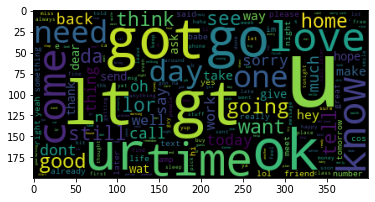

In [131]:
wc1 = WordCloud().generate(ham_text)
plt.imshow(wc1)

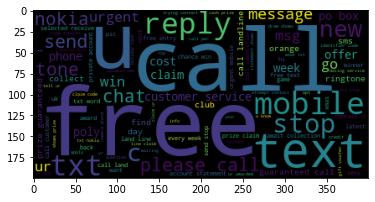

In [132]:
wc2 = WordCloud().generate(spam_text)
plt.imshow(wc2)

# 2

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow['class'] = labels
print(df_bow)

   aa  aah  aaniye  aaooooright  aathi  ab  abbey  abdomen  abeg  abel  ...  \
0   1    3       1            1      6   0      1        1     1     1  ...   
1   0    0       0            0      0   1      0        0     0     0  ...   

   zoom  zouk  zyada  åð  åòharry  åòit  åômorrow  åôrents  ìä  ìï  
0     1     0      1   3        0     0         1        1   1  53  
1     0     1      0   0        1     1         0        0   0   0  

[2 rows x 6983 columns]


# 3

In [134]:
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow['class'] = labels
y = labels
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
f1 = f1_score(y, y_pred, average='weighted')
f1

1.0

# 4

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(text_data)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf['class'] = labels
y = labels
print(df_tfidf)

         aa       aah    aaniye  aaooooright     aathi        ab     abbey  \
0  0.000954  0.002861  0.000954     0.000954  0.005722  0.000000  0.000954   
1  0.000000  0.000000  0.000000     0.000000  0.000000  0.002442  0.000000   

    abdomen      abeg      abel  ...      zoom      zouk     zyada        åð  \
0  0.000954  0.000954  0.000954  ...  0.000954  0.000000  0.000954  0.002861   
1  0.000000  0.000000  0.000000  ...  0.000000  0.002442  0.000000  0.000000   

    åòharry      åòit  åômorrow   åôrents        ìä        ìï  
0  0.000000  0.000000  0.000954  0.000954  0.000954  0.050549  
1  0.002442  0.002442  0.000000  0.000000  0.000000  0.000000  

[2 rows x 6983 columns]


In [136]:
model = LogisticRegression()
model.fit(X_tfidf, y)
y_pred = model.predict(X_tfidf)
f1_tfidf = f1_score(y, y_pred, average='weighted')
print(f1_tfidf)

1.0


# 5

In [137]:
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'\S+@\S+', '', text)  
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'<.*?>', '', text)   
    
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [re.sub(r'\d+', '', word) for word in tokens]
    tokens = [re.sub(r'\W+', '', word) for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubhangi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubhangi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubhangi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shubhangi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [138]:
df['cleaned_text'] = df['v2'].apply(clean_text)

def get_top_n_words(corpus, n=None):
    words = [word for text in corpus for word in text]
    return Counter(words).most_common(n)

ham_texts = df[df['v1'] == 'ham']['cleaned_text']
spam_texts = df[df['v1'] == 'spam']['cleaned_text']

In [139]:
top_10_ham_words = get_top_n_words(ham_texts, 10)
top_10_spam_words = get_top_n_words(spam_texts, 10)

print("Top 10 words in ham messages:", top_10_ham_words)
print("Top 10 words in spam messages:", top_10_spam_words)

ham_text = ' '.join([' '.join(text) for text in df[df['v1'] == 'ham']['cleaned_text']])
spam_text = ' '.join([' '.join(text) for text in df[df['v1'] == 'spam']['cleaned_text']])

text_data = [ham_text, spam_text]
labels = ['ham', 'spam']

Top 10 words in ham messages: [('u', 1076), ('nt', 360), ('gt', 318), ('get', 318), ('lt', 316), ('ok', 279), ('go', 277), ('call', 246), ('got', 245), ('know', 245)]
Top 10 words in spam messages: [('call', 361), ('å', 272), ('free', 221), ('u', 175), ('txt', 156), ('ur', 144), ('text', 139), ('mobile', 136), ('stop', 119), ('claim', 115)]


In [140]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf['class'] = labels
print(df_tfidf)

         aa       aah    aaniye  aaooooright     aathi        ab     abbey  \
0  0.000901  0.002703  0.000901     0.000901  0.005407  0.000000  0.000901   
1  0.000000  0.000000  0.000000     0.000000  0.000000  0.002292  0.000000   

    abdomen      abeg      abel  ...   åòharry      åòit  åômorrow   åôrents  \
0  0.000901  0.000901  0.000901  ...  0.000000  0.000000  0.000901  0.000901   
1  0.000000  0.000000  0.000000  ...  0.002292  0.002292  0.000000  0.000000   

         ìä        ìï       ûud        ûï   ûïharry       ûò  
0  0.000901  0.047759  0.000901  0.000000  0.000000  0.00811  
1  0.000000  0.000000  0.000000  0.002292  0.002292  0.00000  

[2 rows x 7290 columns]


In [141]:
y = labels

model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
f1 = f1_score(y, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 1.0
